# Data Pre-Processing

### Importing the relevent libraries

In [55]:
#pip install xgboost  # package installed.

In [2]:
import numpy as np  # Allows us to work with arrays.
import matplotlib.pyplot as plt  # Allows working with plots.
import pandas as pd  # importing pandas’ library for use. Allows us to import data set and manipulate it.

import seaborn as sns  # Allows to polt beautiful plots.
import matplotlib.pyplot as plt # plotting.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # creates a confusion matrix

from sklearn.compose import ColumnTransformer  # helps with encoding.
from sklearn.preprocessing import OneHotEncoder  # Does onehotencode.
from sklearn.preprocessing import LabelEncoder   # Does 1 and 0 encoding.

### Importing the dataframe

In [1342]:
sucidedataframe = pd.read_csv("who_suicide_statistics.csv")  # opens csv files and assighns them to a variable.

<AxesSubplot:>

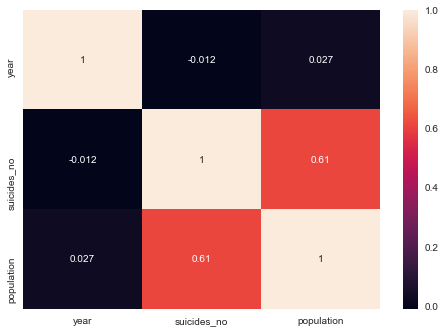

In [1343]:
matrix = sucidedataframe.corr().round(26)
sns.heatmap(data=matrix,annot=True)

### Checking the data from the dataframe before pre-processing

In [1344]:
sucidedataframe.head(1)  # Taking a look at the dataframe the first elements of the dataset.

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0


In [1345]:
sucidedataframe.info()  # checking Basic information on the dataframe being procesed.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      43776 non-null  object 
 1   year         43776 non-null  int64  
 2   sex          43776 non-null  object 
 3   age          43776 non-null  object 
 4   suicides_no  41520 non-null  float64
 5   population   38316 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


In [21]:
sucidedataframe.nunique()

Age                      6
Gender                   2
Population           31107
Suicide_Committed     2231
dtype: int64